In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [4]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

n = len(data)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [5]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

denominator = n * sum_x2 - sum_x * sum_x

m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [6]:
def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db



# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like 
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use 
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*len(data)//batch_size
```

Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512. 

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge. 
```
(64, 1e-7, 1e-1)*1
(64, 1e-7, 1e-1)*2
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*8
...
```

**How to submit your homework**
* Fork the github repo to your personal github 
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github. 

Follow the below instruction on how to do this: 
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md

# My HW Answer

In [11]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

def makeplot():
    # close/delete previous plots
    plt.close('all')
    
    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])
    
    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')
    
    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()
    # gives us time to see the plot
    #time.sleep(2.5)
    # clears the plot when the next plot is ready to show.
    #ipydis.clear_output(wait=True)

batch size: 32, m=63.7432, b=57592.0311, loss=1753544835.8835


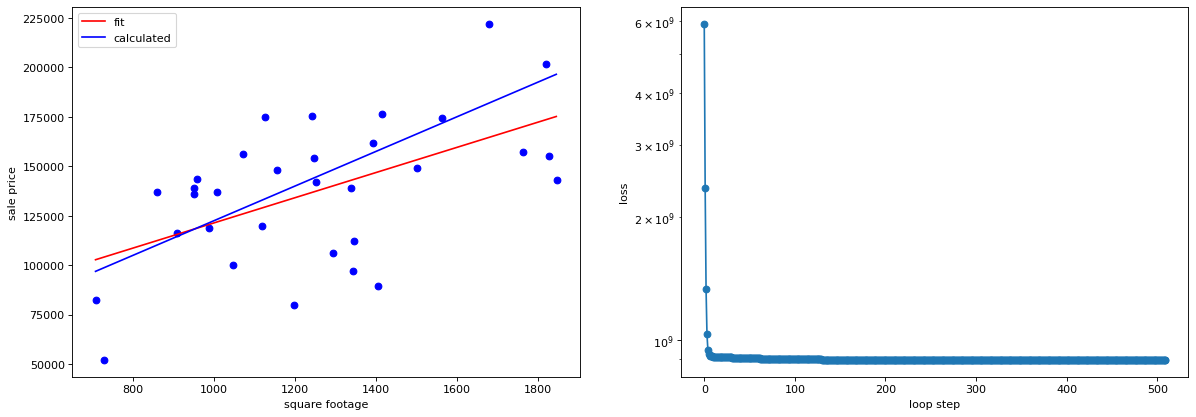

batch size: 64, m=98.1806, b=27555.5795, loss=1565392940.2365


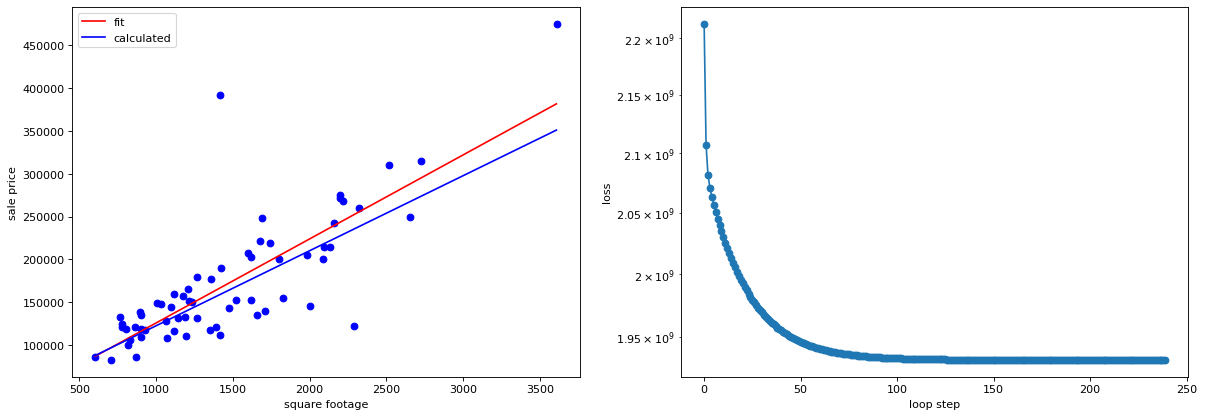

batch size: 128, m=76.1692, b=45365.4022, loss=1545663945.3948


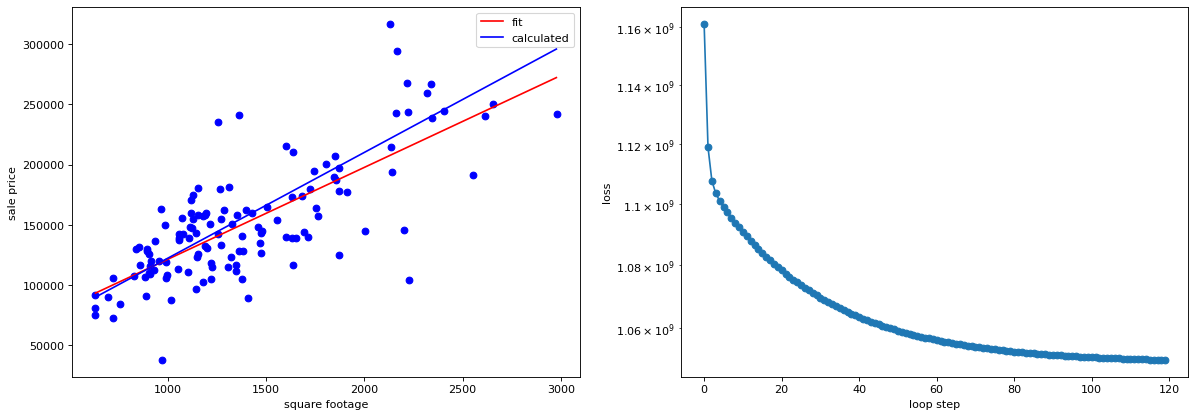

batch size: 256, m=78.9670, b=46186.5593, loss=1499388687.6578


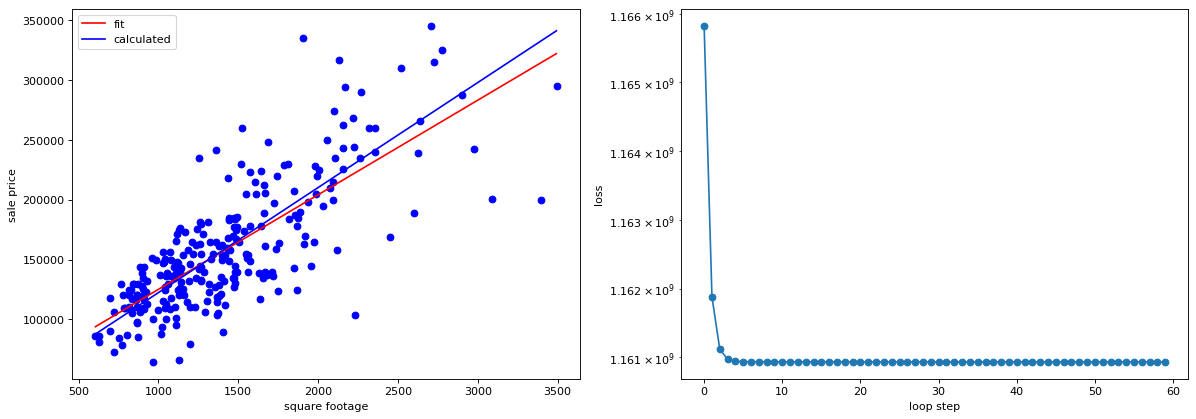

batch size: 512, m=84.1722, b=41023.5385, loss=1482917068.9769


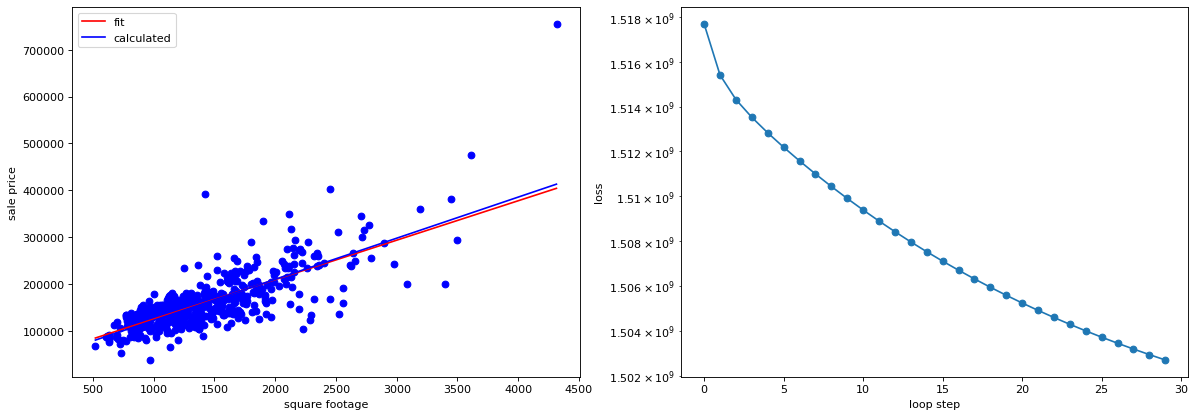

In [19]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

batch_sizes = [32, 64, 128, 256, 512]


# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1

epochs = 30

for batch_size in batch_sizes:
    # use these to plot our progress over time
    loss_history = []
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    data_batch = data.sample(batch_size)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()
    #data_x = data['GrLivArea'].to_numpy()
    #data_y = data['SalePrice'].to_numpy()
    # we run our loop N times
    num_batches = len(data)//batch_size
    loop_N = epochs*num_batches
    for i in range(loop_N):
       # update our slope and intercept based on the current values
       m = updated_m(data_x,data_y,m,b,learning_rate_m)
       b = updated_b(data_x,data_y,m,b,learning_rate_b)
    
       # calculate the loss value
       loss_value = np.mean(loss(data_x,data_y,m,b))
    
       # keep a history of our loss values
       loss_history.append(loss_value)
    
       # print our progress
       #print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
    print(f"batch size: {batch_size}, m={m:.4f}, b={b:.4f}, loss={np.mean(loss(x,y,m,b)):.4f}")
    makeplot()

# Learning Rate

batch size: 64.0, m=71.0432, b=58787.3064, loss=1554235438.5847


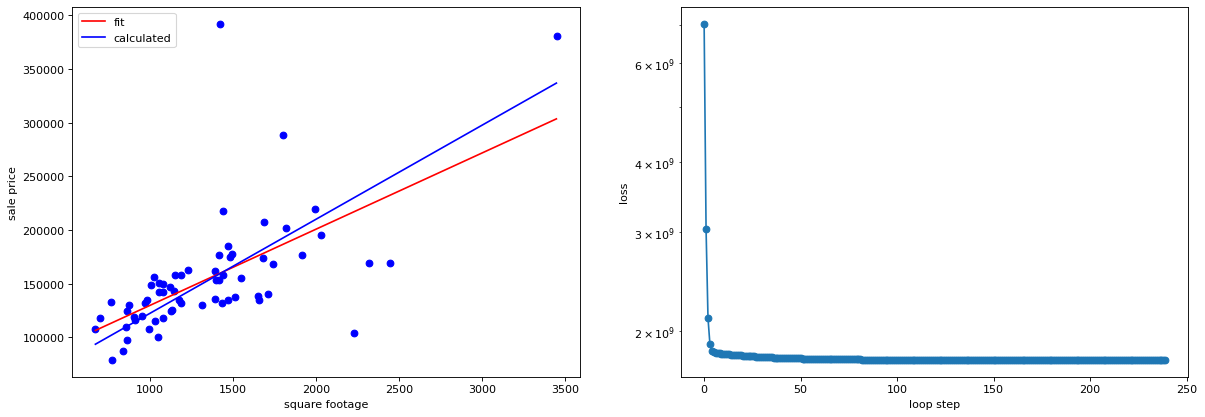

batch size: 128.0, m=80.9410, b=43091.7387, loss=1491635811.7188


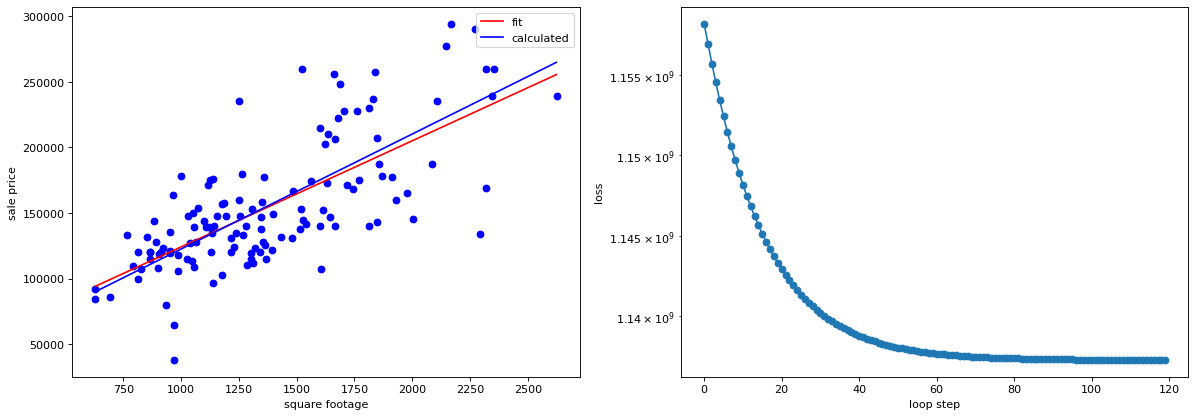

batch size: 256.0, m=100.6581, b=19583.5178, loss=1533538342.1157


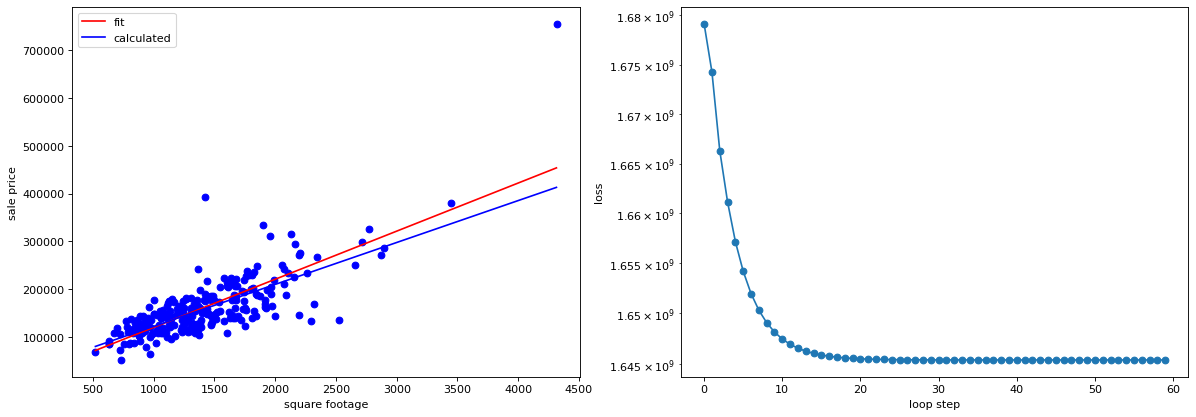

batch size: 512.0, m=-12493.1480, b=18191703.2247, loss=43671183836907.5391


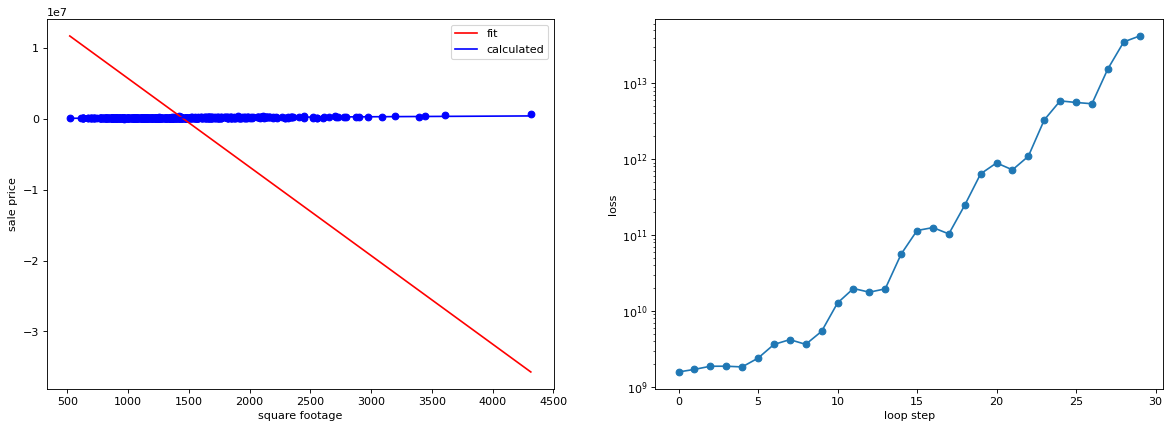

In [23]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

m = 5
b = 1000
epochs = 30

for i in [1,2,4,8]:
    batch_size, learning_rate_m, learning_rate_b = np.array([64, 1e-7, 1e-1])*i
    # use these to plot our progress over time
    loss_history = []
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    data_batch = data.sample(int(batch_size))
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()

    # we run our loop N times
    num_batches = len(data)//batch_size
    loop_N = epochs*int(num_batches)
    for i in range(loop_N):
       # update our slope and intercept based on the current values
       m = updated_m(data_x,data_y,m,b,learning_rate_m)
       b = updated_b(data_x,data_y,m,b,learning_rate_b)
    
       # calculate the loss value
       loss_value = np.mean(loss(data_x,data_y,m,b))
    
       # keep a history of our loss values
       loss_history.append(loss_value)
    
       # print our progress
       #print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
    print(f"batch size: {batch_size}, m={m:.4f}, b={b:.4f}, loss={np.mean(loss(x,y,m,b)):.4f}")
    makeplot()